In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


# Loading the data

In [2]:
# Importing necessary dependencies

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset into the dataframe

housing_df = pd.read_csv("/kaggle/input/boston-housing-dataset/HousingData.csv")

In [4]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


The columns above have the following descriptions:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate 
* **PTRATIO** - pupil-teacher ratio by town
* **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** - % lower status of the population
* **MEDV** - Median value of owner-occupied homes in $1000's (Target Variable)



In [5]:
# Dimension of the Dataset

housing_df.shape

(506, 14)

 The dataset has 506 Rows and 14 columns in which 1 column (MEDV) is the Target variable.

In [6]:
# Checking the info about every column in the dataframe

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# Getting the numerical info about every feature in the dataset

housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In the above table, we can observe that two columns, namely, **"ZN"** & **"CHAS"** have both the 25%, 50% and 75% values as 0. This might suggest us that either they are categorical variables or that they don't contribute much to the prediction of our target variable, **"MEDV"**. 

In [8]:
# Checking for null values in the dataset

housing_df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
# Impute the null values with the mean value of their respective columns

housing_df.fillna(housing_df.mean(), inplace=True)

In [10]:
# Check again for null values

housing_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Data Visualizations for the Housing Data Frame

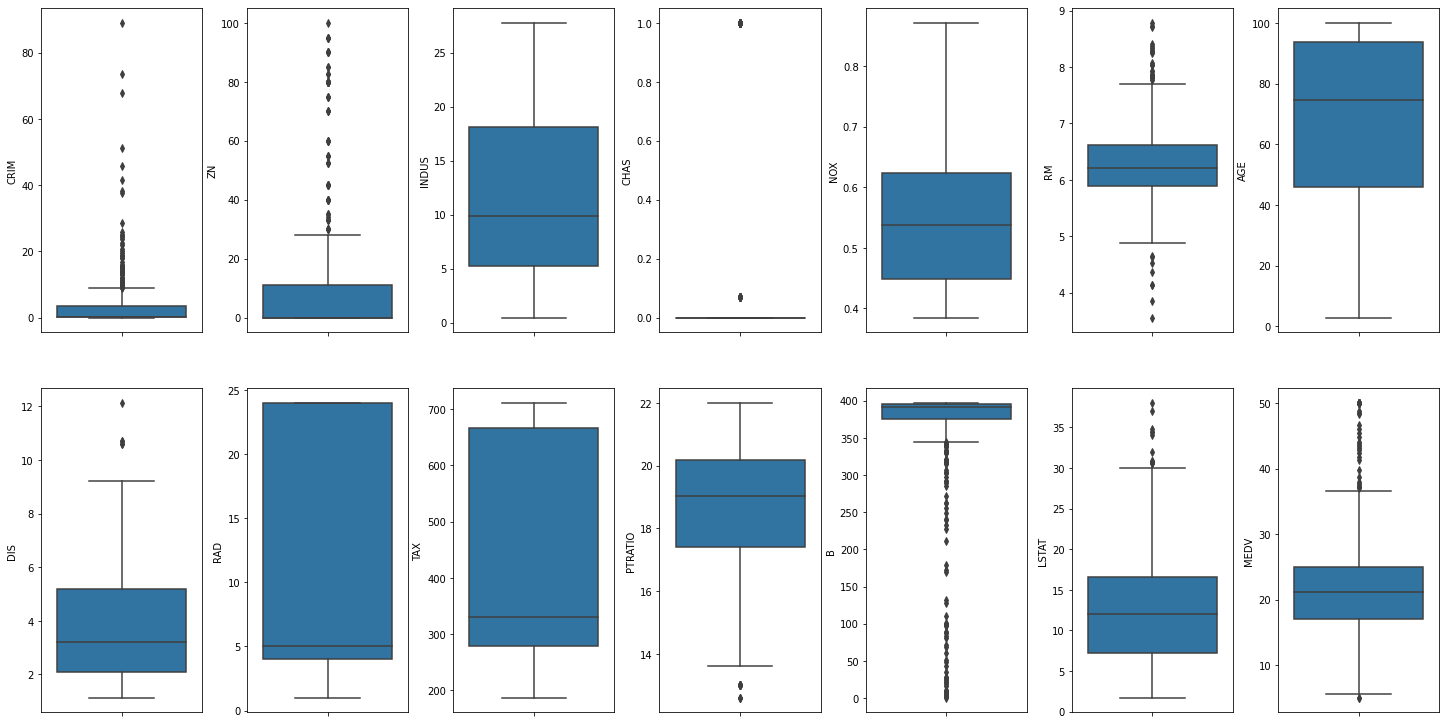

In [11]:
# BOXPLOTS for the individual features of the dataframe

from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in housing_df.items():
    sns.boxplot(y=k, data=housing_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Here, we can observe that there are many outliers in the following features:
* CRIM
* ZN
* CHAS
* B

Also, from our previous observations we can see that, even the **MEDV** value too has an outlier at around 50. 

In [12]:
# Cleaning up the outlier in the MEDV column

housing_df = housing_df[~(housing_df['MEDV']>=50)]

In [13]:
# Check the new shape of the dataframe

housing_df.shape

(490, 14)

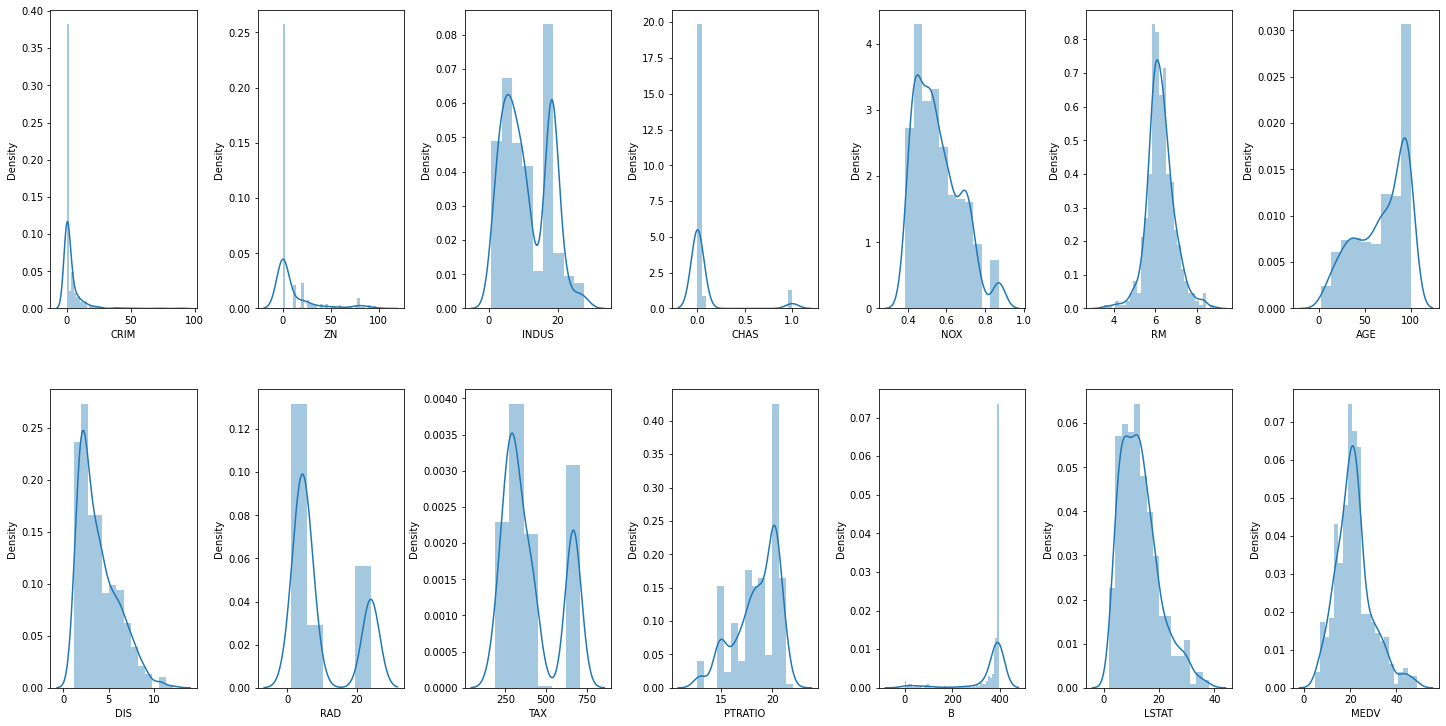

In [14]:
# Distribution plot for all the features in the dataframe 

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Here we can notice that the target variable (**MEDV**) falls under a normal distribution curve. 

Now, we shall look at the correlation between the features of our dataframe.

<AxesSubplot:>

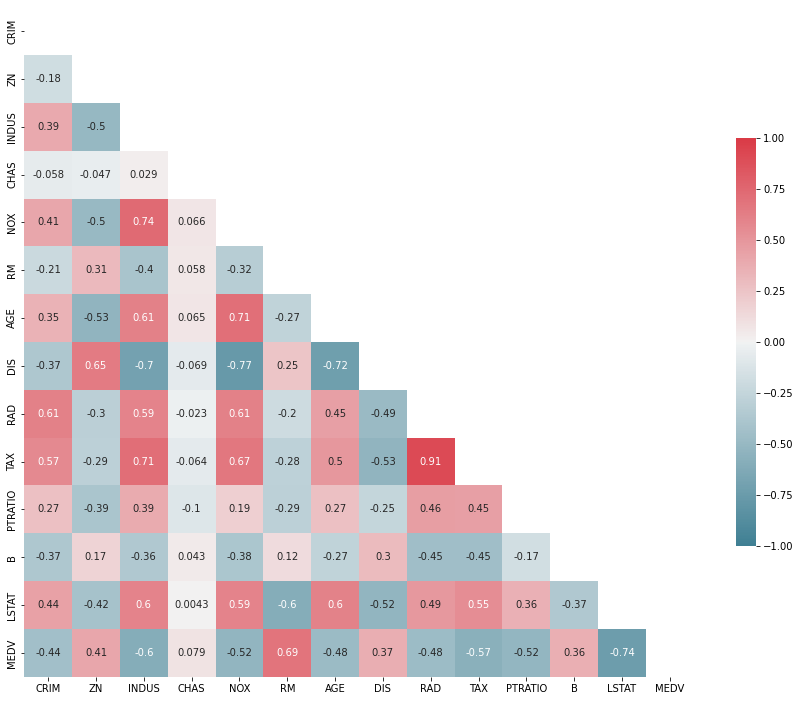

In [15]:
# Plotting a correlation matrix for the dataframe

plt.figure(figsize=(15,15))
corr = housing_df.corr()

# Generating a mask for upper triangle. "TRUE" enables it for us to hide the upper traingle.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Creating a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Creating the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1, center=0, square=True, cbar_kws={"shrink": .5})

* From the above matrix, we can identify that **TAX** & **RAD** are two features which have high positive correlation.
* Also, our target variable (**MEDV**) has notable correlations with **INDUS , NOX, RM, TAX, PTRATIO & LSTAT** (score of above 0.5 out of 1). 

Let's plot the target variable with the above mentioned columns individually.

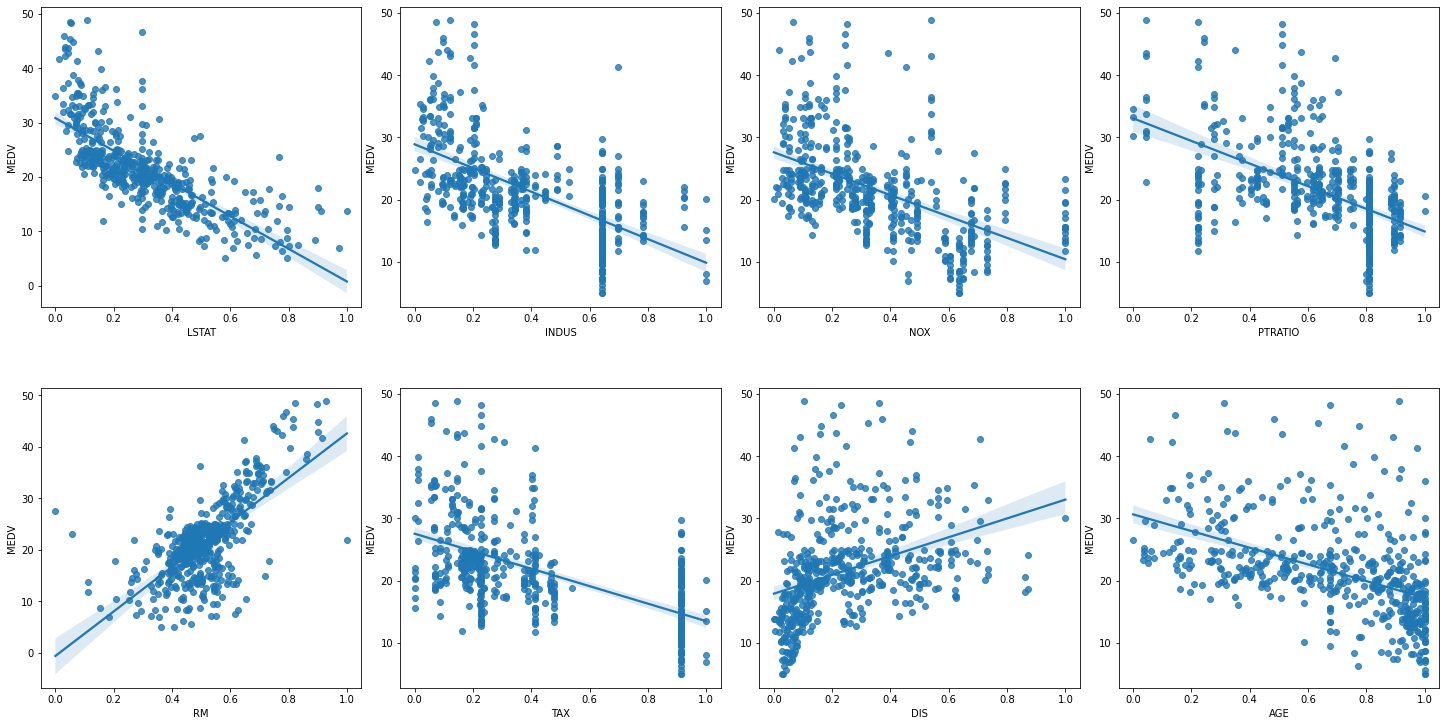

In [16]:
# Let's scale the columns using the MinMax Scaler before plotting them. 

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_selected = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = housing_df.loc[:,column_selected]
y = housing_df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_selected)

# Plot the target variable with other mentioned columns

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_selected):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Splitting of Data

In [17]:
# Separate the target variable from the dataframe

X = housing_df.drop(['MEDV'], axis=1)
y = housing_df['MEDV']

In [18]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [19]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 490, dtype: float64

In [20]:
# Training data & test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model Training & Prediction

In [21]:
# XGBoost Regressor model 

model = XGBRegressor()

In [22]:
# Fit and train the train data set

model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
# Prediction of test data using the above training fit

training_predict = model.predict(X_train)
training_predict

array([19.058163 ,  7.0155053, 27.080109 , 21.694841 , 19.302504 ,
       24.022142 , 20.600304 , 19.88357  , 32.030174 , 10.884746 ,
       22.71602  , 17.110453 , 22.658583 , 18.38081  , 18.32159  ,
       13.503505 , 22.414455 , 21.220966 , 19.400656 , 17.408325 ,
       20.209522 , 18.50503  ,  8.279695 ,  8.400712 , 23.889925 ,
        6.298521 , 10.231576 , 22.000944 ,  8.399714 , 24.505013 ,
       44.7955   , 29.004757 , 22.005398 , 24.216408 , 15.603479 ,
       17.72098  , 21.689623 , 15.607278 , 12.69886  ,  7.4161997,
       15.016025 , 18.602251 , 17.529398 , 19.128859 , 30.03308  ,
       23.009346 , 22.888697 , 19.317211 , 21.675528 , 29.115513 ,
       12.734521 , 22.301401 , 21.687843 , 21.014336 , 22.786543 ,
       13.402352 , 16.505497 , 14.104721 , 22.443052 , 24.490599 ,
       20.615429 , 13.0659   , 21.794697 ,  9.703791 , 28.519686 ,
       33.401386 , 25.289707 , 23.796614 ,  8.802486 , 15.0063715,
       22.604828 , 13.800984 , 17.586336 , 23.311253 , 23.1971

In [24]:
# Error metrics to evaluate the corectness of the model in the Train Data

# R squared error
r_sq_error = metrics.r2_score(y_train, training_predict)

# Mean absolute error
m_ab_error = metrics.mean_absolute_error(y_train, training_predict)

print("R Squared error value: ", r_sq_error)
print("Mean Absolute error value: ", m_ab_error)

R Squared error value:  0.9999953765732132
Mean Absolute error value:  0.011840242512372005


In [25]:
# Predict the Test Data

test_predict = model.predict(X_test)
test_predict

array([26.731928 , 23.95204  , 25.017313 , 21.944412 , 37.284637 ,
       19.423145 , 36.124065 , 35.45824  , 14.371133 , 22.117403 ,
       20.091352 , 35.17811  , 29.957703 , 11.311667 , 17.899862 ,
       21.87565  , 32.883713 , 21.496334 ,  9.252342 , 18.835247 ,
       14.198433 , 12.094823 , 12.899457 , 24.41562  , 16.615423 ,
       13.645355 , 28.135687 , 25.836897 , 25.096111 , 12.863152 ,
       26.565727 , 24.617264 , 11.8166485, 12.105125 , 17.078217 ,
       23.089075 , 25.934437 , 19.05759  , 22.622297 , 19.848911 ,
       23.694286 , 41.167892 , 19.68308  , 20.565317 , 22.21547  ,
       15.590784 , 22.719116 ,  8.082491 , 19.865913 , 13.06875  ,
       19.82261  , 25.232918 , 18.577791 , 27.094986 , 22.903795 ,
       18.769033 , 43.85338  , 25.54358  , 17.481956 , 26.045824 ,
       20.754948 , 36.229248 , 15.413215 , 26.450745 , 26.367456 ,
       34.409775 , 24.873732 , 29.766422 , 17.646215 , 34.25916  ,
       27.609146 , 25.162231 , 20.60316  , 20.66033  , 23.2064

In [26]:
# Error metrics to evaluate the corectness of the model in the Test Data

# R squared error
r_sq_error_t = metrics.r2_score(y_test, test_predict)

# Mean absolute error
m_ab_error_t = metrics.mean_absolute_error(y_test, test_predict)

print("R Squared error value: ", r_sq_error_t)
print("Mean Absolute error value: ", m_ab_error_t)

R Squared error value:  0.9061456327847757
Mean Absolute error value:  1.8158495056385895


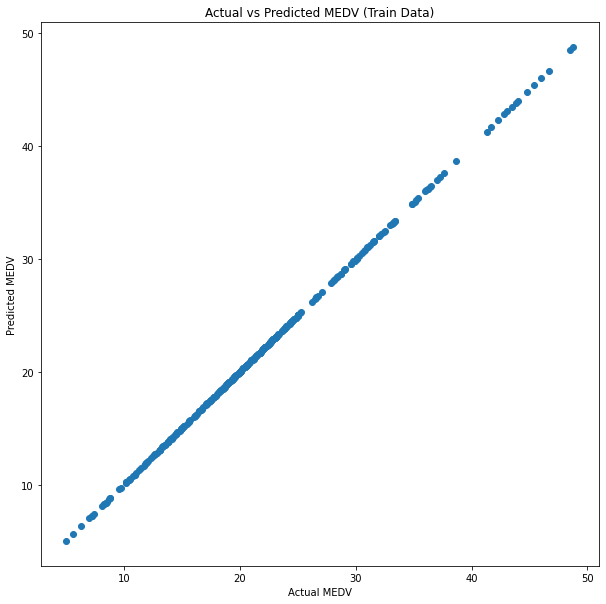

In [27]:
# Plotting the actual values against the predicted values of train data

plt.figure(figsize=(10,10))
plt.title("Actual vs Predicted MEDV (Train Data)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.scatter(y_train, training_predict)

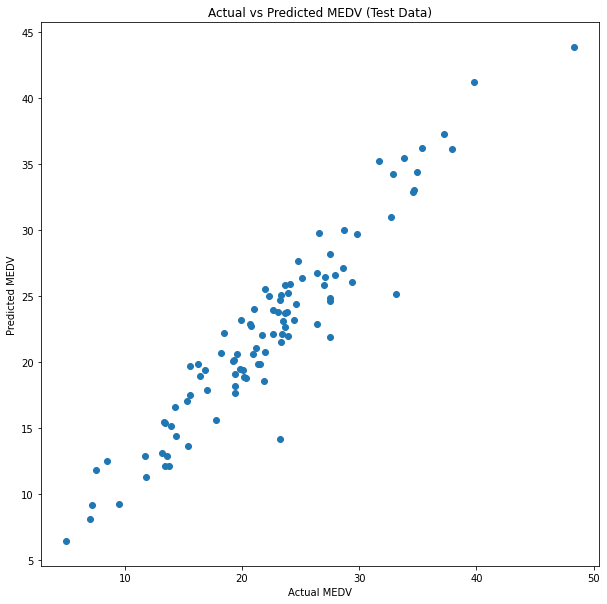

In [28]:
# Plotting the actual values against the predicted values

plt.figure(figsize=(10,10))
plt.title("Actual vs Predicted MEDV (Test Data)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.scatter(y_test, test_predict)